Generate 1,000 samples of two two variables with a strong positive correlation. The first variable will be random numbers drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 20. The second variable will be values from the first variable with Gaussian noise added with a mean of a 50 and a standard deviation of 10.

We will use the randn() function to generate random Gaussian values with a mean of 0 and a standard deviation of 1, then multiply the results by our own standard deviation and add the mean to shift the values into the preferred range.

References:
https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

# Correlation

In [4]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


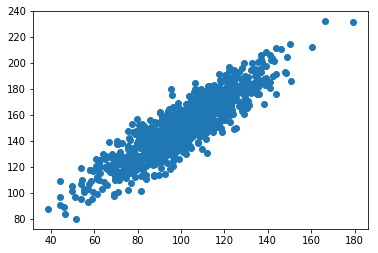

In [5]:
# plot
pyplot.scatter(data1, data2)
pyplot.show()

In [8]:
# calculate covariance matrix
from numpy import cov
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


In [9]:
# calculate the Pearson's correlation between two variables
from scipy.stats import pearsonr
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


In [6]:
# calculate spearman's correlation
from scipy.stats import spearmanr
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)


Spearmans correlation: 0.872


# Gaussian Distribution

A distribution of data refers to the shape it has when you graph it, such as with a histogram.

The most commonly seen and therefore well-known distribution of continuous values is the bell curve. It is known as the “normal” distribution, because it the distribution that a lot of data falls into. It is also known as the Gaussian distribution, more formally, named for Carl Friedrich Gauss.

Examples of Gaussian data are ages, IQ Scores, ..

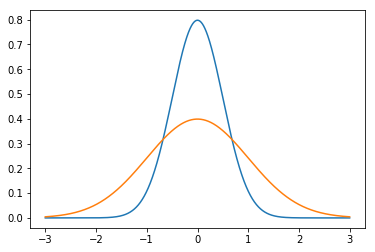

In [16]:
# generate and plot an idealized gaussian
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# x-axis for the plot
x_axis = arange(-3, 3, 0.001)
# low variance gaussian
pyplot.plot(x_axis, norm.pdf(x_axis, 0, 0.5))
# high variance gaussian
pyplot.plot(x_axis, norm.pdf(x_axis, 0, 1))
pyplot.show()


numpy randn() generates random numbers from a gaussian. We can add a mean and multiply by a standard deviation to affect teh resulting gaussian

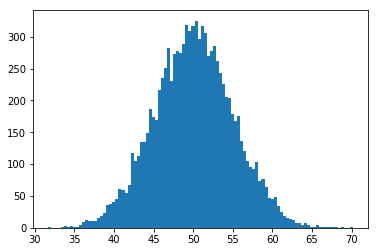

In [12]:
# generate a sample of random gaussians
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# histogram of generated data
pyplot.hist(data, bins=100)
pyplot.show()

### Central Tendency
The central tendency of a distribution refers to the middle or typical value in the distribution. The most common or most likely value.

In the Gaussian distribution, the central tendency is called the mean, or more formally, the arithmetic mean, and is one of the two main parameters that defines any Gaussian distribution.

The mean of a sample is calculated as the sum of the observations divided by the total number of observations in the sample.

This calculation of the arithmetic mean of the sample is an estimate of the parameter of the underlying Gaussian distribution of the population from which the sample was drawn. As an estimate, it will contain errors.

The mean is easily influenced by outlier values, that is, rare values far from the mean. These may be legitimately rare observations on the edge of the distribution or errors.

Further, the mean may be misleading. Calculating a mean on another distribution, such as a uniform distribution or power distribution, may not make a lot of sense as although the value can be calculated, it will refer to a seemingly arbitrary expected value rather than the true central tendency of the distribution.

In the case of outliers or a non-Gaussian distribution, an alternate and commonly used central tendency to calculate is the median.

The median is calculated by first sorting all data and then locating the middle value in the sample. This is straightforward if there is an odd number of observations. If there is an even number of observations, the median is calculated as the average of the middle two observations.

We can calculate the median of a sample of an array by calling the median() NumPy function

In [18]:
# calculate mean
result = mean(data)
print('Mean: %.3f' % result)

# calculate median
from numpy import median
result = median(data)
print('Median: %.3f' % result)

# calculate variance
from numpy import var
result = var(data)
print('Variance: %.3f' % result)

# calculate standard deviation
from numpy import std
result = std(data)
print('Standard Deviation: %.3f' % result)

Mean: 50.049
Median: 50.042
Variance: 24.939
Standard Deviation: 4.994


The underlying distribution has the true mean of 50, we can see that the estimate from a sample of 10,000 observations is reasonably accurate.

The median is not too dissimilar from the mean because the sample has a Gaussian distribution. If the data had a different (non-Gaussian) distribution, the median may be very different from the mean and perhaps a better reflection of the central tendency of the underlying population.

The SD is similar to the true sd of 5

# Central Limit Theorem

Roll a dice multiple times and we would expect a mean value of 3.5 with some error based upon teh law of large numbers

In [20]:
# generate random dice rolls
from numpy.random import seed
from numpy.random import randint
from numpy import mean
# seed the random number generator
seed(1)
# generate a sample of die rolls
rolls = randint(1, 7, 50)
print(rolls)
print(mean(rolls))

[6 4 5 1 2 4 6 1 1 2 5 6 5 2 3 5 6 3 5 4 5 3 5 6 3 5 2 2 1 6 2 2 6 2 2 1 5
 2 1 1 6 4 3 2 1 4 6 2 2 4]
3.44


We can then repeat this process multiple times, such as 1,000. This will give us a result of 1,000 sample means. According to the central limit theorem, the distribution of these sample means will be Gaussian.

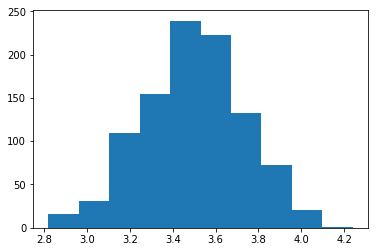

In [21]:
# demonstration of the central limit theorem
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from matplotlib import pyplot
# seed the random number generator
seed(1)
# calculate the mean of 50 dice rolls 1000 times
means = [mean(randint(1, 7, 50)) for _ in range(1000)]
# plot the distribution of sample means
pyplot.hist(means)
pyplot.show()

## Normality Tests
Check if a sample has a normal distribution

In [30]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn, rand
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# generate random observations
data_r = 5 * rand(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))
print('mean=%.3f stdv=%.3f' % (mean(data_r), std(data_r)))

mean=50.303 stdv=4.426
mean=52.522 stdv=1.525


Histogram plot to get rough idea of distributions. We see random sample doesn't follow a particular distribution

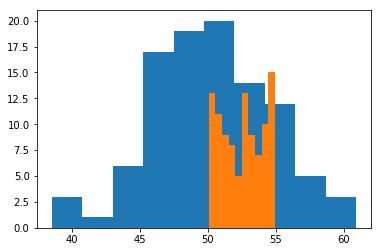

In [31]:
# histogram plot
pyplot.hist(data)
pyplot.hist(data_r)
pyplot.show()

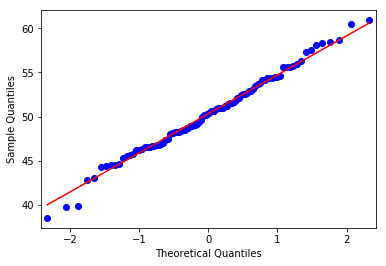

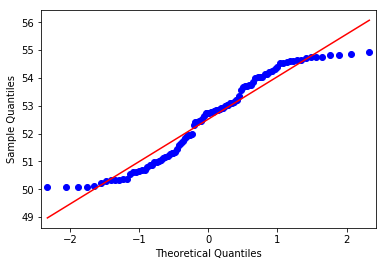

In [33]:
# QQ Plot
from statsmodels.graphics.gofplots import qqplot
qqplot(data, line='s')
qqplot(data_r, line='s')
pyplot.show()